<a href="https://colab.research.google.com/github/intTing/1/blob/main/3cases_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function to compute Geodesic

In [1]:
import numpy as np
from scipy.linalg import logm, sqrtm, inv, expm, eigh

# Scale-rotation geodesic
def geodesic_scale_rotation(X, Y, t):
    """
    Compute the scale-rotation geodesic point χ(t) between SPD matrices X and Y.
    X = U D U^T, Y = V Λ V^T are eigen-decompositions of X and Y.
    - A = log(V U^T) represents the rotational difference
    - L = log(D^{-1} Λ) represents the scaling difference
    The geodesic is: χ(t) = [exp(tA) U] [exp(tL) D] [exp(tA) U]^T
    """
    # Eigen-decomposition of X and Y
    D_vals, U = eigh(X)
    Lambda_vals, V = eigh(Y)
    # Lambda_vals = array of eigenvalues of Y
    # V = eigenvector matrix of Y

    # Form diagonal matrices from eigenvalues
    D = np.diag(D_vals)
    Lambda = np.diag(Lambda_vals)

    # Compute A = log(V U^T) in so(n)
    A = logm(V @ U.T)

    # Compute L = log(D^{-1} Λ)
    D_inv = np.linalg.inv(D)
    L = logm(D_inv @ Lambda)

    exp_tA = expm(t * A)
    exp_tL = expm(t * L)

    Ut = exp_tA @ U
    Dt = exp_tL @ D

    # Reconstruct SPD matrix on the geodesic
    Xt = Ut @ Dt @ Ut.T
    return Xt

**Scale-rotation geodesic: χ(t) = [exp(tA) · U] · [exp(tL) · D] · [exp(tA) · U]^T**

A ∈ so(n)，描述旋转

L ∈ Sym(n)，描述缩放

In [2]:
def plot_spd_ellipse(S, ax, color='tab:blue', radius=1.5):
    theta = np.linspace(0, 2 * np.pi, 200)
    circle = np.vstack((np.cos(theta), np.sin(theta)))
    ell = sqrtm(S) @ circle
    ax.plot(ell[0, :], ell[1, :], color=color)

    ax.set_aspect('equal')
    ax.set_xlim(-radius, radius)
    ax.set_ylim(-radius, radius)
    # ax.axis('off') # Hide axis

# Check: try simple test case
X = [[1, 0], [0, 1]]

Y = [[1, 0], [0, 1]]

In [3]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

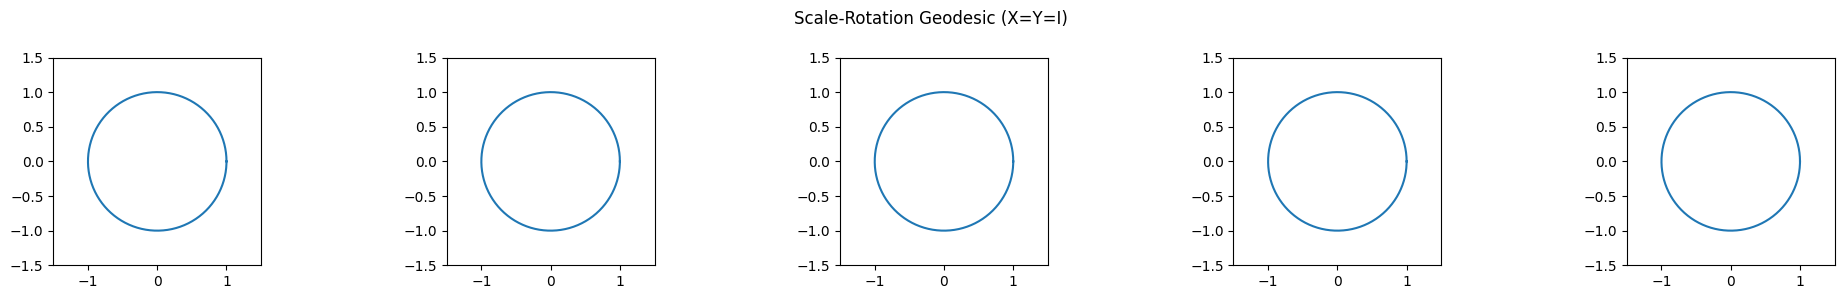

In [4]:
X_test = np.eye(2)  # 2×2 identity matrix
Y_test = np.eye(2)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
row_titles = ["Scale-Rotation"]
selected_ts = np.linspace(0, 1, 5)

# For each t, calculate geodesic and draw ellipse
for i, t in enumerate(selected_ts):
    plot_spd_ellipse(geodesic_scale_rotation(X_test, Y_test, t), axes[i])
    # axes[i].set_title(f"t={t:.2f}")

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

plt.suptitle("Scale-Rotation Geodesic (X=Y=I)")
plt.tight_layout()
plt.show()

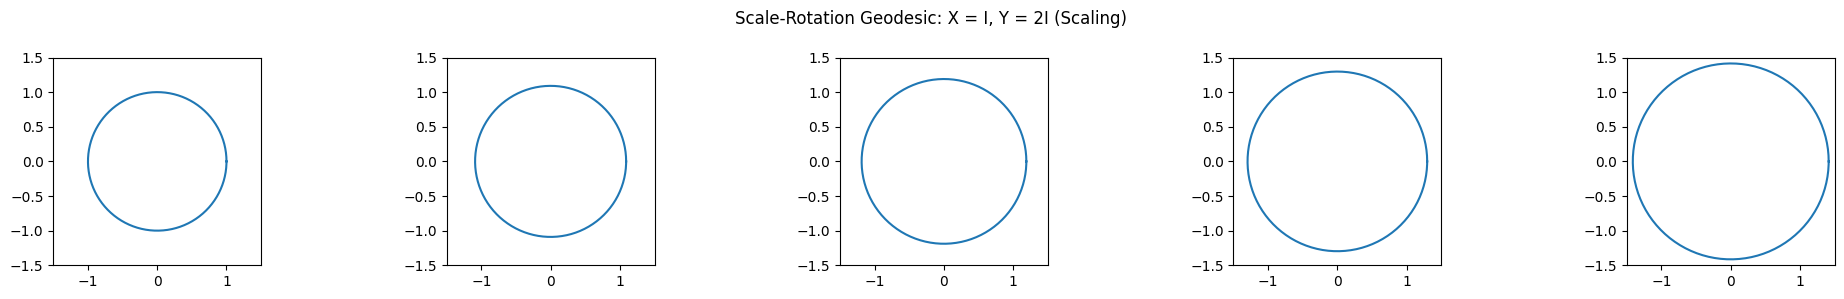

In [5]:
X_test2 = np.eye(2)
Y_test2 = 2 * np.eye(2)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
selected_ts = np.linspace(0, 1, 5)  # t = 0, 0.25, ..., 1

for i, t in enumerate(selected_ts):
  plot_spd_ellipse(geodesic_scale_rotation(X_test2, Y_test2, t), axes[i])

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

plt.suptitle("Scale-Rotation Geodesic: X = I, Y = 2I (Scaling)")
plt.tight_layout()
plt.show()


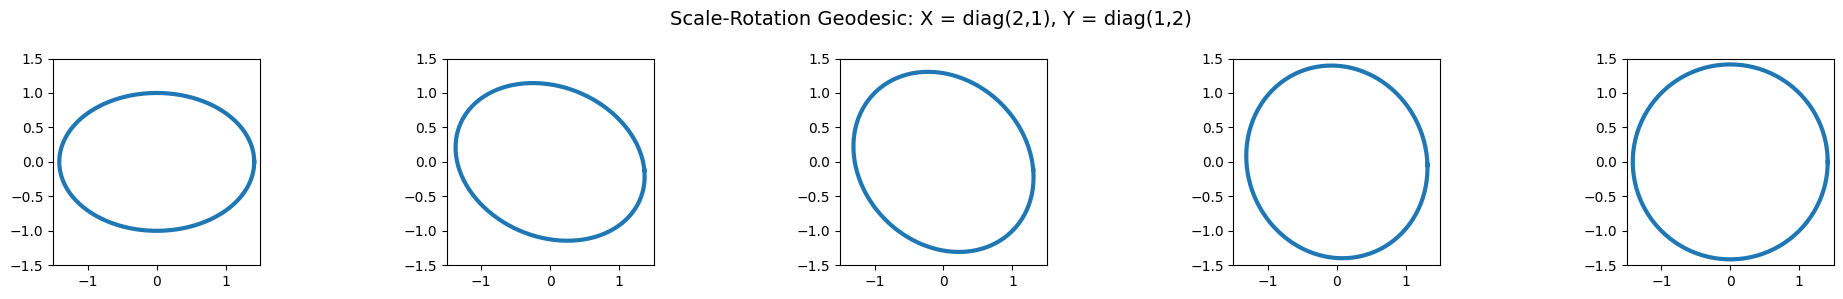

In [9]:
X_test3 = np.diag([2, 1])
Y_test3 = np.diag([2, 2])

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for i, t in enumerate(selected_ts):
  plot_spd_ellipse(geodesic_scale_rotation(X_test3, Y_test3, t), axes[i])

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

plt.suptitle("Scale-Rotation Geodesic: X = diag(2,1), Y = diag(1,2)", fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
def plot_spd_ellipse(S, ax, color='tab:blue', radius=1.5, linewidth=3):
    theta = np.linspace(0, 2 * np.pi, 200)
    circle = np.vstack((np.cos(theta), np.sin(theta)))
    ell = sqrtm(S) @ circle
    ax.plot(ell[0, :], ell[1, :], color=color, linewidth=linewidth)

    ax.set_aspect('equal')
    ax.set_xlim(-radius, radius)
    ax.set_ylim(-radius, radius)
    # ax.axis('off')

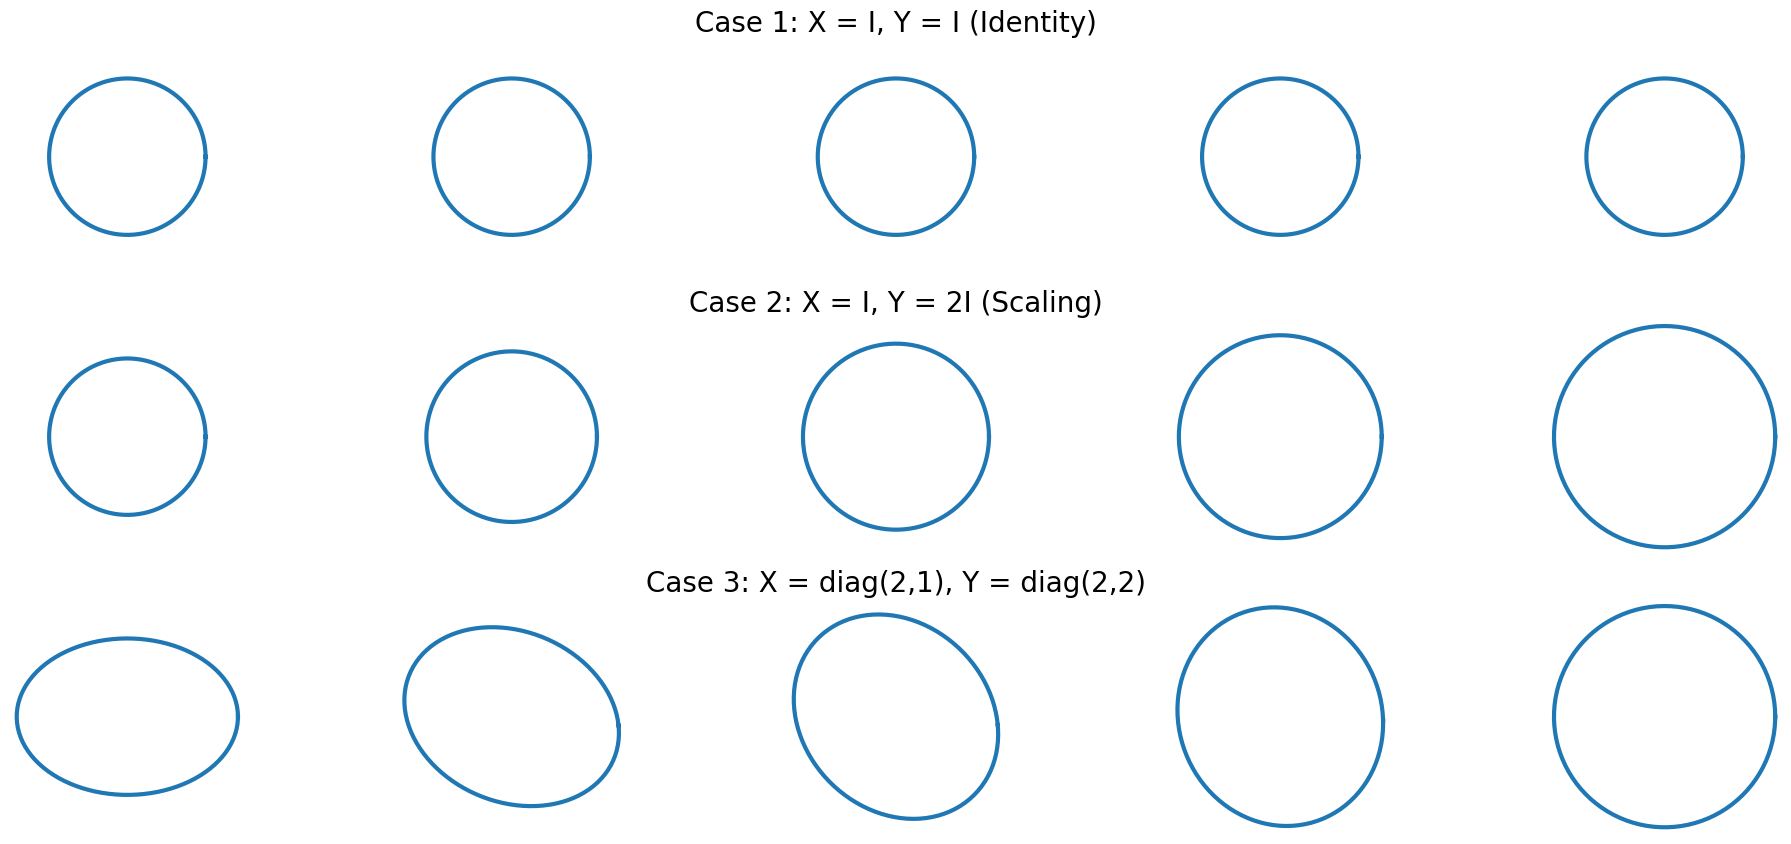

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 已经定义好以下内容：
# - plot_spd_ellipse()
# - geodesic_scale_rotation()

# 定义三个测试用例
X_test1, Y_test1 = np.eye(2), np.eye(2)
X_test2, Y_test2 = np.eye(2), 2 * np.eye(2)
X_test3, Y_test3 = np.diag([2, 1]), np.diag([2, 2])
selected_ts = np.linspace(0, 1, 5)

# 创建 3 行 5 列的子图
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 9))  # 适配一页显示

# 所有测试组
tests = [(X_test1, Y_test1, "X = I, Y = I (Identity)"),
         (X_test2, Y_test2, "X = I, Y = 2I (Scaling)"),
         (X_test3, Y_test3, "X = diag(2,1), Y = diag(2,2)")]

# 循环处理每一行
for row_idx, (X, Y, title) in enumerate(tests):
    for col_idx, t in enumerate(selected_ts):
        ax = axes[row_idx, col_idx]
        plot_spd_ellipse(geodesic_scale_rotation(X, Y, t), ax, linewidth=3)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal')
        ax.axis('off')  # 关闭坐标轴显示
        if col_idx == 2:  # 中间列加标题
            ax.set_title(f"Case {row_idx+1}: {title}", fontsize=20)

# 总标题
# fig.suptitle("Scale–Rotation Geodesics (3 Cases)", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出 suptitle 空间
plt.show()